### **"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."** - _Definition of Terrorism_

#### The main question I will try to answer with this Data Exploration is how relevant is this definition with the data we have?

## 1. Importing relevant libraries

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas
import warnings
import datetime as dt
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

warnings.filterwarnings('ignore')

sns.set(style = 'darkgrid') # setting style of facetgrid in seaborn

In [76]:
# setting display options for dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Methods involve in EDA
   - Understanding the problem : Here we will look all the variables and do philosophical analysis about their meaning and importance for the problem
   - Univariate study : We will look at the target variable and get to know more about it.
   - Bivariate study : We will assess the relationship between each variable with the target variable if necessary.
   - Basic cleaning : We'll clean the dataset and handle the missing data, outliers and categorical variables.
 

## 2. Data cleaning

In [3]:
# reading file
df = pd.read_csv('Global_terrorism_dataset/globalterrorismdb_0718dist_utf.csv', encoding = 'utf-8-sig')
df_original = df.copy()   # in case

In [4]:
df.shape     # dimension of data

(181691, 135)

In [5]:
 #just to display columns as row-wise to look all columns at once
columns = df.columns.tolist()         
print(columns)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [6]:
# renaming relevant columns
df.rename(columns = {'iyear':'year','imonth':'month','iday':'day','region':'enc_region',\
                     'attacktype1_txt':'attacktype','attacktype1':'enc_attacktype',\
                     'provstate':'province','country':'enc_country',\
                     'targtype1_txt':'target_type','targtype1':'enc_target',\
                     'targsubtype1_txt':'target_subtype',\
                     'target1':'target_entity','weaptype1':'enc_weapon_type',\
                     'weaptype1_txt':'weapon_type','weapsubtype1_txt':'weapon_subtype','weapsubtype1':'enc_weapon_subtype',\
                     'corp1':'entity','natlty1':'enc_nationality','natlty1_txt':'nationality',\
                     'gname':'group','nkill':'killed','nwound':'wounded',\
                     'targsubtype':'enc_target_subtype',\
                     'ishostkid':'hostages/kidnapping','INT_LOG':'cross_border',\
                     'INT_IDEO':'ideological_international'}, inplace = True)

In [7]:
# categorizing columns based on data types
categorical = ['extended','crit1','crit2','crit3','doubtterr','alternative','alternative_txt','multiple','enc_country','country_txt','enc_region','region_txt','vicinity','specificity','enc_attacktype','attacktype','enc_weapon_type','weapon_type','enc_weapon_subtype','weapon_subtype','success','suicide','target_entity','enc_target','target_type','target_subtype','enc_nationality','nationality','claimed','property','cross_border','ideological_international','province','entity','group','hostages/kidnapping','city','INT_MISC','INT_ANY','individual']
numerical = ['eventid','year','month','day','latitude','longitude','killed','nkillter','wounded']
text = ['approxdate','summary','related','location']

In [8]:
# converting specific columns to category data type
for item in categorical:
    if item not in df.columns:
        pass
    else:
        df[item] = df[item].astype('category')

In [9]:
# unique categories in each categorical column
for feature in categorical:
    print(feature,":",len(df[feature].unique()),'labels')


extended : 2 labels
crit1 : 2 labels
crit2 : 2 labels
crit3 : 2 labels
doubtterr : 4 labels
alternative : 6 labels
alternative_txt : 6 labels
multiple : 3 labels
enc_country : 205 labels
country_txt : 205 labels
enc_region : 12 labels
region_txt : 12 labels
vicinity : 3 labels
specificity : 6 labels
enc_attacktype : 9 labels
attacktype : 9 labels
enc_weapon_type : 12 labels
weapon_type : 12 labels
enc_weapon_subtype : 31 labels
weapon_subtype : 31 labels
success : 2 labels
suicide : 2 labels
target_entity : 86007 labels
enc_target : 22 labels
target_type : 22 labels
target_subtype : 113 labels
enc_nationality : 216 labels
nationality : 216 labels
claimed : 4 labels
property : 3 labels
cross_border : 3 labels
ideological_international : 3 labels
province : 2856 labels
entity : 33239 labels
group : 3537 labels
hostages/kidnapping : 4 labels
city : 36675 labels
INT_MISC : 3 labels
INT_ANY : 3 labels
individual : 2 labels


In [10]:
len(categorical)

40

In [11]:
# Function to get basic information about data (features and null values)
def null_info(df, columns):
    df = df.drop(columns = columns)
    
    # create empty dataframe
    df_null_info = pd.DataFrame(np.random.randn(0,9)*0,columns = ['% of columns containing non_missing values',\
                                                                  '% of columns containing missing values',\
                                                                  '% of columns containing >50% missing values',\
                                                                  '% of columns containing <=50% missing values',\
                                                                  '% of columns containing >90% missing values',\
                                                                  'No. of features',\
                                                                  'No. of categorical features',\
                                                                  'No. of numerical features',\
                                                                  'No. of Text features'])
    
    df_null = pd.DataFrame(df.isnull().sum()/len(df))
    df_null.columns = ['Null_values']
    df_null_info.loc[0,'No. of features'] = round(df_null.shape[0])
    df_null_info.loc[0,'No. of categorical features']= round(len(categorical))
    df_null_info.loc[0,'No. of numerical features']= round(len(numerical))
    df_null_info.loc[0,'No. of Text features']= round(len(text))
    
    df_null_info.loc[0,'% of columns containing non_missing values'] = round(100*len(df_null[df_null.Null_values ==0.0])/len(df_null),2)
    df_null_info.loc[0,'% of columns containing missing values'] = round(100*len(df_null[df_null.Null_values >0.0])/len(df_null),2)
    df_null_info.loc[0,'% of columns containing >50% missing values'] = round(100*len(df_null[df_null.Null_values >0.50])/len(df_null),2)
    df_null_info.loc[0,'% of columns containing <=50% missing values'] = round(100*len(df_null[df_null.Null_values <=0.50])/len(df_null),2)
    df_null_info.loc[0,'% of columns containing >90% missing values'] = round(100*len(df_null[df_null.Null_values >0.90])/len(df_null),2)
    df_null_info = df_null_info.rename(index = {0:'Values'})
    return df_null_info.T

 

In [12]:
null_info(df,['success','eventid'])

,Values
% of columns containing non_missing values,20.30
% of columns containing missing values,79.70
% of columns containing >50% missing values,57.89
% of columns containing <=50% missing values,42.11
% of columns containing >90% missing values,46.62
No. of features,133.00
No. of categorical features,40.00
No. of numerical features,9.00
No. of Text features,4.00


Findings:
- 79% columns in the dataset have missing values
- 57% columns have more than 50% of missing values
- 46% columns have more than 90% of missing values
- Only 21% columns have zero missing values

In [13]:
# function to get missing and unique values in data w.r.t each column
def missing_unique(df):
    df = df.drop(columns = ['success','eventid'])
    df_null = pd.DataFrame()
    for col in df.columns:
        df_null.loc[col, 'Unique Categories'] = len(df[col].unique())
        df_null.loc[col, '% of_Null_Values'] = round(df[col].isnull().sum()*100/ len(df),2)
        df_null.loc[col, 'dtype'] = df[col].dtype
    print("Shape of the Data:",df.shape)
    # Visualizing the missing values
    f,ax =plt.subplots(figsize=(20,6))
    plt.xticks(rotation='90')
    fig = sns.barplot(x = df_null.index , y = df_null['% of_Null_Values'], color = '#787887',alpha=0.5)
    plt.tick_params(axis='x', which='major', labelsize=10 ,labelcolor = '#2C2E2B' )  # change appearance of tick and tick labels
    plt.xlabel("Features" , fontsize = 15)
    plt.ylabel("% of_Null_Values" , fontsize = 15)
    plt.title("Missing_Values_in_the_Dataset", fontsize = 20, loc = 'center',fontweight="bold")
    plt.show()
    return df_null.sort_values(ascending = False, by = '% of_Null_Values')


Shape of the Data: (181691, 133)


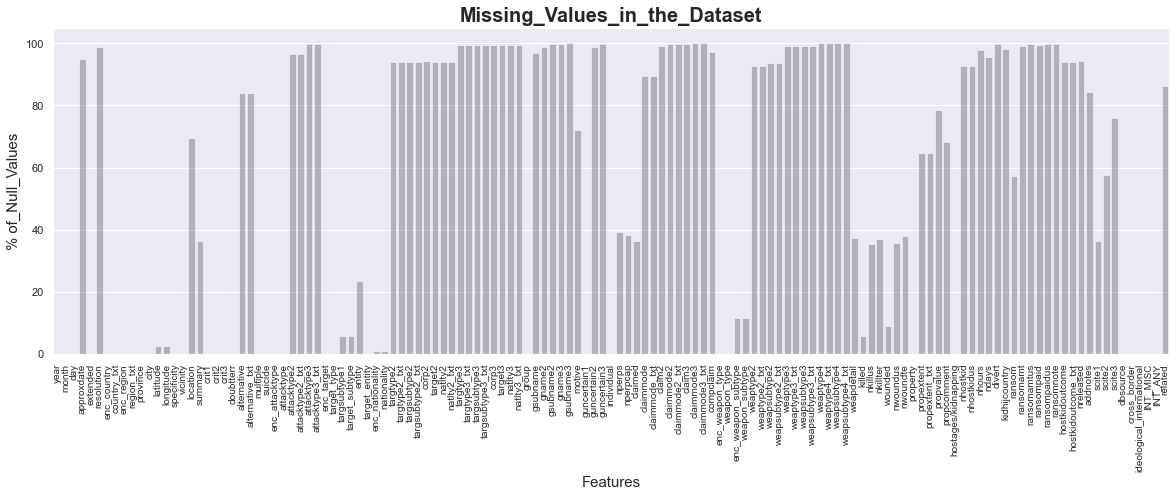

,Unique Categories,% of_Null_Values,dtype
gsubname3,15.0,99.99,object
weapsubtype4_txt,17.0,99.96,object
weapsubtype4,17.0,99.96,float64
weaptype4_txt,6.0,99.96,object
weaptype4,6.0,99.96,float64
claimmode3_txt,9.0,99.93,object
claimmode3,9.0,99.93,float64
gsubname2,61.0,99.91,object
claim3,3.0,99.82,float64
guncertain3,3.0,99.82,float64


In [14]:
# verifying if there are any int/float features which needed a eye to get converted
# to categorical based on unique values (int/float features with few categories)
missing_unique(df)

In [15]:
# since data collection was in four parts w.r.t year so, we looked the changes in the data to get something interesting
df[df['year']>1997].isnull().sum()*100/len(df[df['year']>1997])

eventid                       0.000000
year                          0.000000
month                         0.000000
day                           0.000000
approxdate                   91.935823
extended                      0.000000
resolution                   99.196910
enc_country                   0.000000
country_txt                   0.000000
enc_region                    0.000000
region_txt                    0.000000
province                      0.008758
city                          0.380088
latitude                      0.817978
longitude                     0.817978
specificity                   0.005255
vicinity                      0.000000
location                     52.140405
summary                       0.000000
crit1                         0.000000
crit2                         0.000000
crit3                         0.000000
doubtterr                     0.000876
alternative                  83.817347
alternative_txt              83.817347
multiple                 

In [16]:
df[df['year']>2008].isnull().sum()*100/len(df[df['year']>2008])

eventid                       0.000000
year                          0.000000
month                         0.000000
day                           0.000000
approxdate                   90.207132
extended                      0.000000
resolution                   99.603435
enc_country                   0.000000
country_txt                   0.000000
enc_region                    0.000000
region_txt                    0.000000
province                      0.003277
city                          0.286226
latitude                      0.579007
longitude                     0.579007
specificity                   0.004370
vicinity                      0.000000
location                     49.879829
summary                       0.000000
crit1                         0.000000
crit2                         0.000000
crit3                         0.000000
doubtterr                     0.001092
alternative                  83.492833
alternative_txt              83.492833
multiple                 

In [17]:
df[df['year']>2011].isnull().sum()*100/len(df[df['year']>2011])

eventid                        0.000000
year                           0.000000
month                          0.000000
day                            0.000000
approxdate                    88.511695
extended                       0.000000
resolution                   100.000000
enc_country                    0.000000
country_txt                    0.000000
enc_region                     0.000000
region_txt                     0.000000
province                       0.002600
city                           0.000000
latitude                       0.622782
longitude                      0.622782
specificity                    0.000000
vicinity                       0.000000
location                      56.403989
summary                        0.000000
crit1                          0.000000
crit2                          0.000000
crit3                          0.000000
doubtterr                      0.001300
alternative                   81.350357
alternative_txt               81.350357


As being mentioned in the [GTD Database](https://start.umd.edu/gtd/downloads/Codebook.pdf) that data collection has been done by different agencies during different interval of time, so as we tried to break these datasets into these different intervals, we find that data before 2007 have mostly missing values. So we can drop values before 1997. But since most of the columns have more than 20% values missing which tells us we should drop the entire column as we should focus on features which might be value to model if built in future.

In [11]:
# Based on the above findings, we drop columns with >20% missing values (As imputing with more than this value might create bias in the data)
df = df.drop(columns = ['eventid','dbsource','specificity','guncertain1','INT_MISC','INT_ANY'])
df = df.loc[:,df.isnull().sum()/len(df) <0.20]
df.head()

,year,month,day,extended,enc_country,country_txt,enc_region,region_txt,province,city,latitude,longitude,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,enc_attacktype,attacktype,enc_target,target_type,targsubtype1,target_subtype,target_entity,enc_nationality,nationality,group,individual,enc_weapon_type,weapon_type,enc_weapon_subtype,weapon_subtype,killed,wounded,property,hostages/kidnapping,cross_border,ideological_international
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,MANO-D,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,0,0
1,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,0,1
2,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States,Unknown,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,-9,-9
3,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,Unknown,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,-9,-9
4,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Consulate,217.0,United States,Unknown,0,8,Incendiary,NaN,NaN,NaN,NaN,1,0.0,-9,-9


Let's change the Date columns to Datetime type

In [12]:
# creating Datetime feature with relevant features
df['Date'] = pd.to_datetime(df[['year','month','day']], errors = 'coerce')
df.head()

,year,month,day,extended,enc_country,country_txt,enc_region,region_txt,province,city,latitude,longitude,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,enc_attacktype,attacktype,enc_target,target_type,targsubtype1,target_subtype,target_entity,enc_nationality,nationality,group,individual,enc_weapon_type,weapon_type,enc_weapon_subtype,weapon_subtype,killed,wounded,property,hostages/kidnapping,cross_border,ideological_international,Date
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,MANO-D,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,0,0,1970-07-02
1,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,0,1,NaT
2,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States,Unknown,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,-9,-9,NaT
3,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,Unknown,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,-9,-9,NaT
4,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Consulate,217.0,United States,Unknown,0,8,Incendiary,NaN,NaN,NaN,NaN,1,0.0,-9,-9,NaT


For now I will drop the Null Date and geospatial data values, will look into it later.

In [13]:
# creating relevant Date related and other important features
df['week'] = df['Date'].dt.isocalendar().week
df['day_name'] = df['Date'].dt.day_name()
df['weekday'] = df['Date'].dt.weekday
df['is_weekend'] = np.where(((df['Date']).dt.dayofweek) < 5,0,1)
df.dropna(subset = ['Date','latitude','longitude'], inplace = True)
df.reset_index(inplace = True, drop = True)
df['casualities'] = df['killed']+df['wounded']

In [14]:
df.head()

,year,month,day,extended,enc_country,country_txt,enc_region,region_txt,province,city,latitude,longitude,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,enc_attacktype,attacktype,enc_target,target_type,targsubtype1,target_subtype,target_entity,enc_nationality,nationality,group,individual,enc_weapon_type,weapon_type,enc_weapon_subtype,weapon_subtype,killed,wounded,property,hostages/kidnapping,cross_border,ideological_international,Date,week,day_name,weekday,is_weekend,casualities
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,MANO-D,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,0,0,1970-07-02,27,Thursday,3.0,0,1.0
1,1970,1,1,0,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,0,1,1,1,0.0,0.0,1,0,2,Armed Assault,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Headquarters,217.0,United States,Black Nationalists,0,5,Firearms,5.0,Unknown Gun Type,0.0,0.0,1,0.0,-9,-9,1970-01-01,1,Thursday,3.0,0,0.0
2,1970,1,2,0,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,0,1,1,1,0.0,0.0,0,0,1,Assassination,3,Police,25.0,Police Security Forces/Officers,Juan Maria de Lucah/Chief of Directorate of in...,218.0,Uruguay,Tupamaros (Uruguay),0,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,0.0,0.0,0,0.0,0,0,1970-01-02,1,Friday,4.0,0,0.0
3,1970,1,2,0,217,United States,1,North America,California,Oakland,37.791927,-122.225906,0,1,1,1,1.0,0.0,1,0,3,Bombing/Explosion,21,Utilities,107.0,Electricity,Edes Substation,217.0,United States,Unknown,0,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0,1,0.0,-9,-9,1970-01-02,1,Friday,4.0,0,0.0
4,1970,1,2,0,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,0,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,4,Military,28.0,Military Recruiting Station/Academy,"R.O.T.C. offices at University of Wisconsin, M...",217.0,United States,New Year's Gang,0,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,0.0,0.0,1,0.0,0,0,1970-01-02,1,Friday,4.0,0,0.0


In [15]:
# Again looking for Null values
df.isnull().sum()

year                             0
month                            0
day                              0
extended                         0
enc_country                      0
country_txt                      0
enc_region                       0
region_txt                       0
province                       406
city                           423
latitude                         0
longitude                        0
vicinity                         0
crit1                            0
crit2                            0
crit3                            0
doubtterr                        1
multiple                         1
success                          0
suicide                          0
enc_attacktype                   0
attacktype                       0
enc_target                       0
target_type                      0
targsubtype1                 10093
target_subtype               10093
target_entity                  593
enc_nationality               1498
nationality         

### What to expect?
   In order to understand our data, we have to look at each variable to understand their meaning and relevance on the data. And Hell yeah, this will be time consuming but it will give us flavours of dataset. We will follow this way:
   - Variable : Variable Name
   - Type : Identify the variable's type. There are 2 possible ways i.e numerical and categorical. 
      - Numerical : variables for which values are numbers
      - Categorical : variables for which values are categories
   - Segment : Identify the variable's segment. For now it seems like we might have 4 segments i.e 
       - Location : variables which gives some type of information about the location of the attack
       - Damage : variables which gives some type of information about the damages it occurred after the attack whether life or property
       - Attack type : variables which gives information about type of attack which took place i.e which can be linked to terrorism
       - Weapons used : variables which gives information about the weapons used during these attacks
   

In [16]:
# let's check data type of all features
df.dtypes

year                                  int64
month                                 int64
day                                   int64
extended                           category
enc_country                        category
country_txt                        category
enc_region                         category
region_txt                         category
province                           category
city                               category
latitude                            float64
longitude                           float64
vicinity                           category
crit1                              category
crit2                              category
crit3                              category
doubtterr                          category
multiple                           category
success                            category
suicide                            category
enc_attacktype                     category
attacktype                         category
enc_target                      

In [17]:
print('Country with Highest Terrorist Attacks:',df['country_txt'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['region_txt'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['killed'].max(),'that took place in',df.loc[df['killed'].idxmax()].country_txt)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


In [18]:
df_copy = df.copy()
df_copy1 = df.copy()
df_copy.drop(columns = ['enc_country','enc_region','enc_attacktype','enc_target','enc_nationality','enc_weapon_type','enc_weapon_subtype'],inplace = True)
df_copy1.drop(columns = ['enc_country','enc_region','enc_attacktype','enc_target','enc_nationality','enc_weapon_type','enc_weapon_subtype'],inplace = True)

In [19]:
df_copy['weapon_type'] = df_copy['weapon_type'].apply(lambda x: x.split()[0] if 'Vehicle' in x.split() else x)

## 3. Self created Important Functions for Data Exploration

In [20]:
# Visualizing all categorical features with countplot (UniVariate Plot)

def count_plot(data, feature, palette =None, ax = None):
    if data[feature].value_counts().shape[0]>15:
        plt.figure(figsize = (17,6)) # defining figure size
        #fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
        ax = sns.countplot(x = feature, data = data,\
                           order = data[feature].value_counts()[:20].index, \
                           palette = palette, \
                           edgecolor=sns.color_palette('dark',7),\
                           ax = None)
        #plt.rcParams['figure.dpi'] = 360
        total = float(len(data))
        ax.set_xticklabels(ax.get_xticklabels(), rotation =90)  # rotating x-axis labels
        
        sns.set_context('talk')  # setting size of labels , lines and other elements in plot but doesn't change overall style
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total , '.1f')  # to write % values of each bar on top
            x = p.get_x() + p.get_width() / 2.  # to put % value in center of each bar
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha = 'center' , va = 'center', xytext = (0, 9) , textcoords = 'offset points',fontsize = 16)

        plt.show()
    else:
        plt.figure(figsize = (10,6))
        ax = sns.countplot(x = feature, data = data, \
                           palette = palette,\
                           edgecolor=sns.color_palette('dark',7), \
                           order = data[feature].value_counts().index,\
                           ax = None)
        #plt.rcParams['figure.dpi'] = 360
        total = float(len(data))
        ax.set_xticklabels(ax.get_xticklabels(), rotation =90)
        
        sns.set_context('talk')
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total , '.1f')  # to write % values of each bar on top
            x = p.get_x() + p.get_width() / 2.   # to put % value in center of each bar
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha = 'center', va = 'center', xytext = (0, 9) , textcoords = 'offset points',fontsize = 16)
        
    plt.tight_layout()
    plt.show()


In [21]:
# Global setting parameters for Plot
# params = {'legend.fontsize': 'medium',    #‘xx-small’, ‘x-small’, ‘small’, ‘medium’, ‘large’, ‘x-large’, ‘xx-large
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'medium',
#          'axes.titlesize':'medium',
#          'xtick.labelsize':'medium',
#          'ytick.labelsize':'medium'}
# plt.rcParams.update(params)

In [22]:
# converting categories to object type for renaming labels for proper visualization of plot (though renaming can be done earlier without this)
columns = list()
for item in df_copy.select_dtypes('category'):
    columns.append(item)

for item in columns:
    if item not in df_copy.columns:
        pass
    else:
        df_copy[item] = df_copy[item].astype(object)

In [23]:
# renaming labels from numerics to string for proper naming convention
def label_rename(data , feature):
    if data[feature].nunique() == 2:
        data[feature +"_rename"] = data[feature].map({0:'Unsuccessful attempt' ,1:'Successful attempt'} )
    elif data[feature].nunique() == 3 :
        data[feature+"_rename"] = data[feature].map({0:'Unsuccessful attempt' , 1:'Successful attempt' , -9:'Unknown'} )
    
    return data[feature+"_rename"]

In [24]:
# Country-wise analysis of Terror Attacks and their destruction

def country_analysis(data , country=None , feature1=None , feature2=None , line_color=None , palette=None , title =None):
    plt.figure(figsize = (20,17))
    #Plot 1
    plt.subplot(2,2,1)
    sns.countplot(y = data.loc[data['country_txt'] == country]['city'] ,\
                  order = data.loc[data.country_txt == country].city.value_counts()[:10].index,\
                  data = data ,\
                  palette = sns.color_palette(palette,10),\
                  edgecolor = sns.color_palette('dark',5))
    plt.xticks(rotation = 90)
    plt.title(f"Terror attacks on Top 10 cities of {country}",weight = 'bold' ,fontsize = 18 ,loc = 'left')
    plt.xlabel('Count',fontsize = 20)
    plt.ylabel('City',fontsize = 20)
    
    #Plot 2
    plt.subplot(2,2,2)
    plt.pie(x = label_rename(data.query('country_txt == @country') , feature1).value_counts().values.tolist() ,\
            labels = label_rename(data.query('country_txt == @country') , feature1).value_counts().index.tolist() ,\
            autopct='%1.1f%%' ,\
            #explode = np.linspace(0.05 ,0.1  , 2) ,\
            pctdistance=0.45,\
            wedgeprops={"edgecolor":"1",'linewidth': 1,
                    'linestyle': 'dashed', 'antialiased': True},  textprops={'fontsize':20})
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(title ,weight = 'bold' ,fontsize = 18 ,loc = 'left',pad =30 )  # f"Terrorist {feature1} rate in {country}"
    plt.axis('equal')
    
    #Plot 3
    plt.subplot(2,2,3)
    data.query('country_txt == @country').groupby(['year'])['casualities'].sum().plot(xticks = data.loc[data.country_txt == country].groupby(['year'])['casualities'].sum().index, rot=90 , color = line_color)
    plt.title(f"Total casualities from (1970 - 2017) in {country}", fontdict = {'fontsize' : 18 , 'weight': 'bold' } , loc = 'left')
    plt.ylabel("Casualities" ,fontsize = 20)
    plt.xlabel('Year',fontsize = 20)
   
    
    
    #Plot 4
    plt.subplot(2,2,4)
    sns.countplot(x = data.query('country_txt == @country').group ,\
                  data = data ,\
                  order = data.query('country_txt == @country').group.value_counts()[:10].index[1:],\
                  palette = sns.color_palette(palette,7),\
                  edgecolor = sns.color_palette('dark',5))
    plt.title(f"Terrorist Groups active/were active in {country}",weight = 'bold' ,fontsize = 18 , loc = 'left')
    plt.xticks(rotation =90)
    plt.xlabel('Group',fontsize = 20)
    plt.ylabel('Attack_Count',fontsize = 20)
    
    plt.subplots_adjust(wspace = 1 ,hspace =0.5 ,top = 0.5 , bottom = 0.1)  # tune the subplot layout
    plt.tight_layout()   #to avoid overlapping of subplots and fit them cleanly in figure
    plt.show()
    

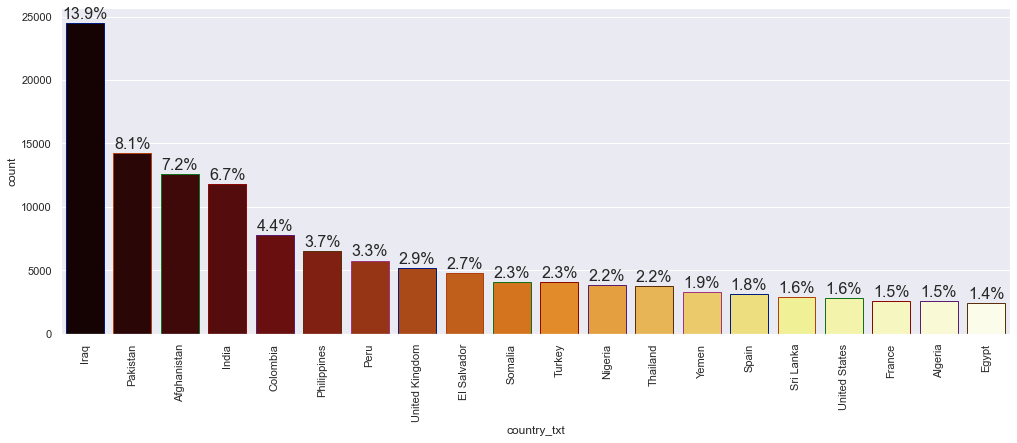

<Figure size 432x288 with 0 Axes>

In [25]:
count_plot(df_copy,'country_txt', 'afmhot')

- The most number of attacks took place till now are in **Iraq** (~ 25,000) which is huge in (~ 50 years) means on average ~ 500 attacks per year i.e ~ 1.36 attacks per day.
- It seems like in general eye as it is their daily job to plan and attack. (and also it seems like they are really good at this).
- We can interpret this in general sense that there is so much instability in this country despite being "**Oil Rich country**".
- The top 4 affected countries in list are either Islam as religion or Muslim majority neighbouring countries.

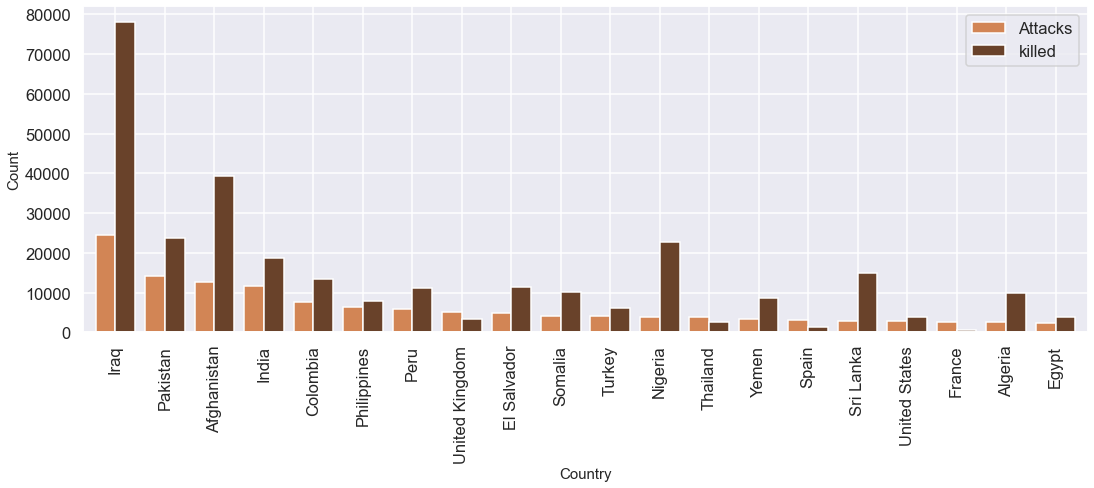

In [26]:
# Comparing No. of Attacks with Killings for each country
attacks = df_copy.country_txt.value_counts()[:20].to_frame()
attacks.columns = ['Attacks']
kills = df_copy.groupby(['country_txt'])['killed'].sum().sort_values(ascending =False).to_frame()
attacks.merge(kills, how = 'left' , left_index = True, right_index = True ).plot.bar(width = 0.8 , color = sns.color_palette('copper_r',2))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.ylabel("Count" ,fontsize = 15)
plt.xlabel("Country",fontsize = 15)
plt.show()

- Look at the bar of Iraq, it shows terrorist are very effective in getting what they wish for i.e destruction in terms of lives and same can be said for top 5 countries.
- It also shows how **Intelligence and Security agencies** are not as **efficient and vigilant** w.r.t internal security of their countries.
- This also proves the above assumption that **attacks generally happens in densely populated areas** thus it will eventually claim many lives.
- The most safe country w.r.t this chart is France as the "attacks > kills".

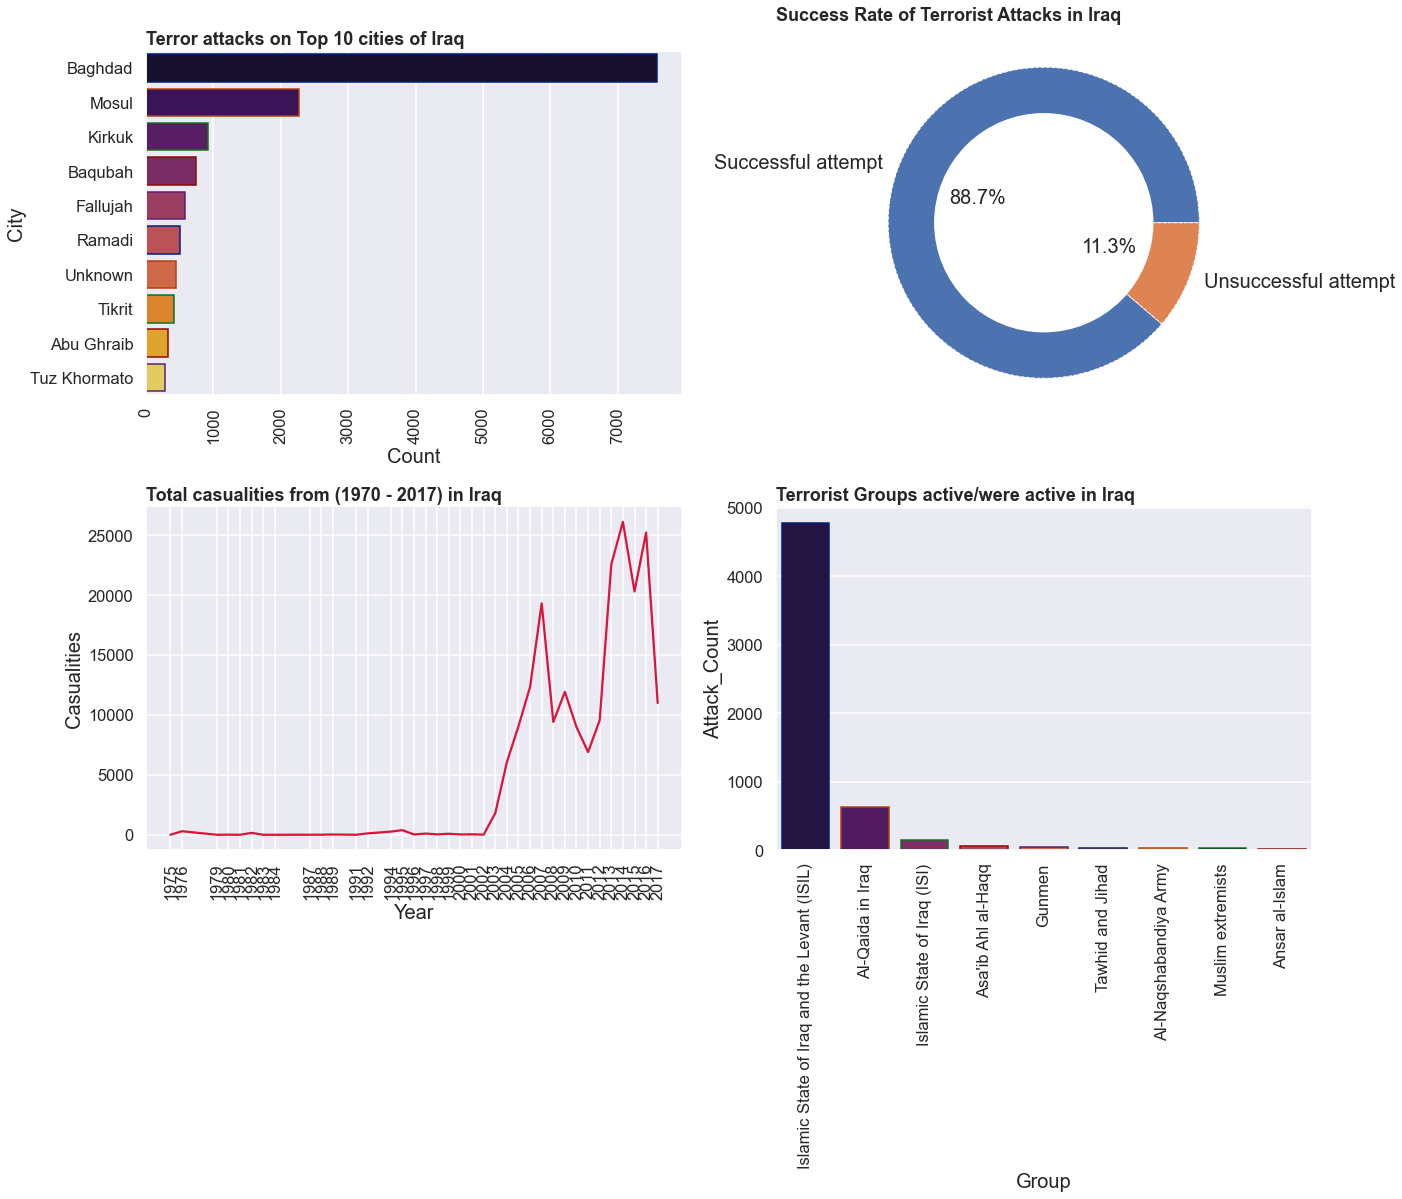

In [34]:
country_analysis(df_copy, country ='Iraq', feature1 ='success', title = "Success Rate of Terrorist Attacks in Iraq", palette = 'inferno', line_color = 'crimson')

- It seems like terror Attacks have been increased substantially since 2002 and the main group responsible for these is ISIL (Islamic State and it's groups local to region).
- The casualities have also increased since 2002 as the success rate of attack is good.
- The success rate of their attacks is very much good (~89%) and as mentioned earlier, the capital Baghdad is their favourite seems like.

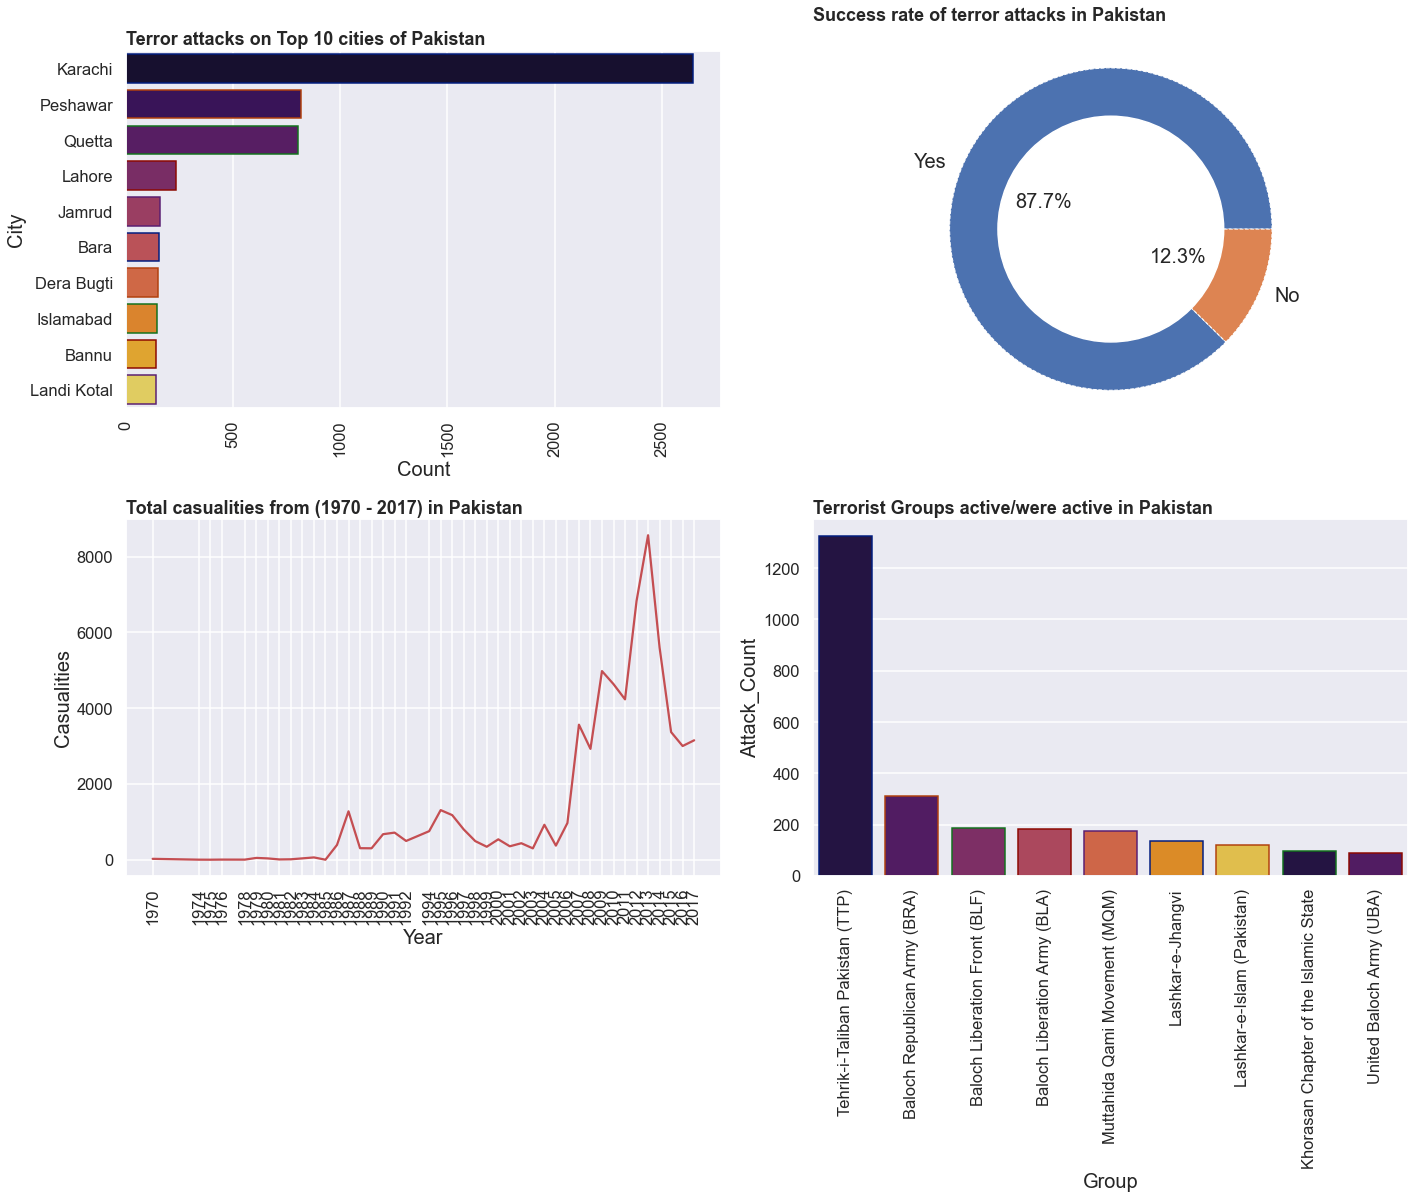

In [35]:
country_analysis(df_copy, country = 'Pakistan' , feature1 = 'success' , title = "Success rate of terror attacks in Pakistan" , palette = 'inferno' , line_color = 'r')

- The main group responsible for attacks in Pakistan is "Tehrik-i-Taliban Pakistan" (Taliban group for this region) but as per current scenerio "Baloch Republican Army" is increasing their attacks.
- Karachi seems like their favourite place and it means it is densly populated city of Pakistan.
- Success Rate of these groups is also good in terms of achievement for them.

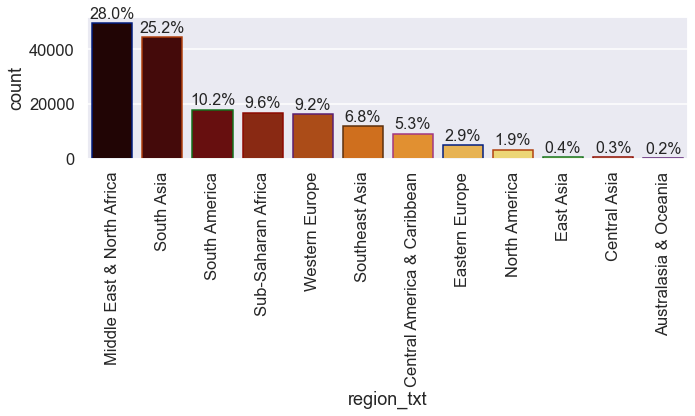

In [36]:
count_plot(df_copy,'region_txt','afmhot')

- As expected from above graphs, the most affected regions are **MIddle-East and South Asia** which comprises of more than **50% terror attacks** on the Planet.

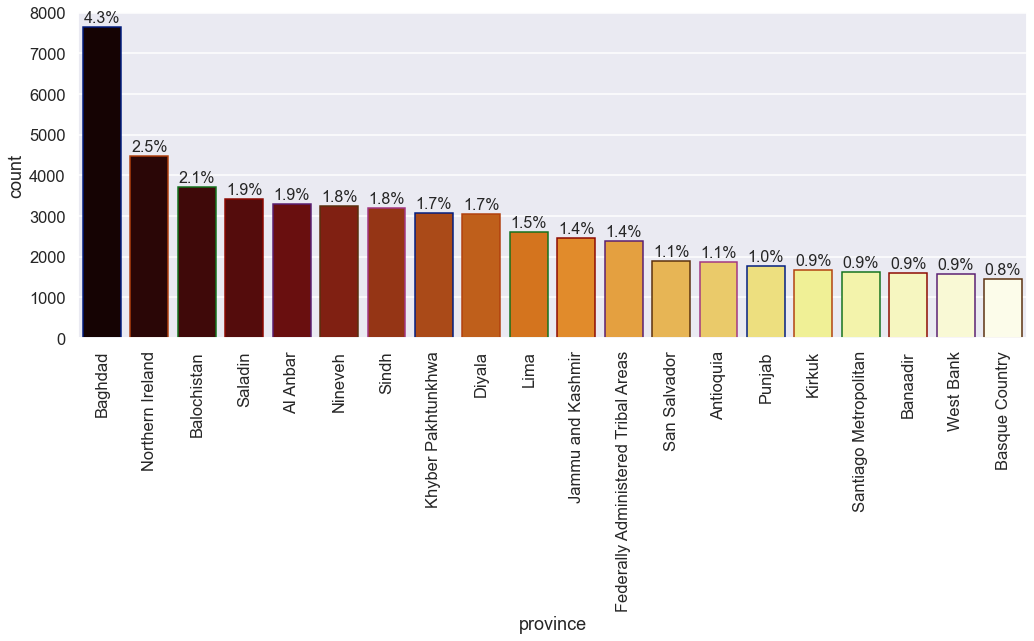

<Figure size 432x288 with 0 Axes>

In [37]:
count_plot(df_copy, 'province','afmhot')

**For Top 3 provinces here**:
- Since Iraq is the most affected country hence it's capital i.e Baghdad will be first target of terrorist. **(They love to showoff their skills)**
- However with respect to northern Ireland this is surprising for general eye as this is part of developed nation. Being follower of International Relations and interest in it, on being read about it, the incidents happened might be due to historical border issues which was due to Colonial Rule with Republic of Ireland(different country). To summaries in brief, this province/state which is part of United Kingdom has nationalistic people who want this state to divide from U.K and want to join in Republic of Ireland due to difference in Religious demographics i.e (Protestant and Catholic (forms of Christianity))among people.
- Same is the issue with Balochistan which wants it's own country and doesn't want to be with Pakistan though historically after Pakistan independence, it's army forcefully captures Balochistan (then comprised of 4 princely states ) as it was asked to join into Pakistan by then leader of state "Mohd. Ali Jinnah" though the communique before partition of India, says it will give independent sovereign status to Kalat (formally known as Balochistan).
- Out of top 20 provinces 6 are from Middle East and 6 from South Asia region.

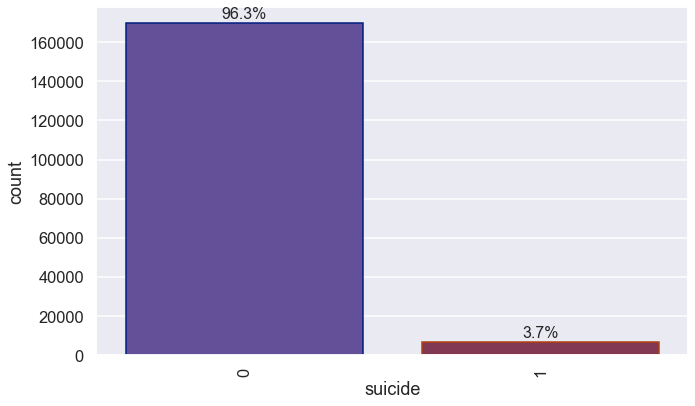

In [38]:
count_plot(df_copy, 'suicide','twilight')

- The Terrorist are fond of losing their lives in the name of so called "**JIHAD**" (which is according to them losing life for greater good).
- This data seems highly imbalanced for modelling.

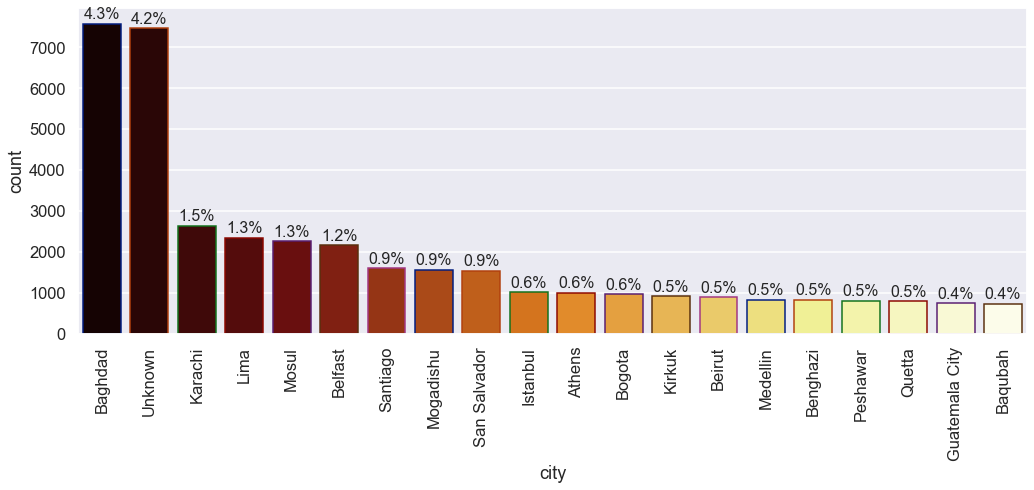

<Figure size 432x288 with 0 Axes>

In [39]:
count_plot(df_copy,'city','afmhot')

- As expected Baghdad is most affected city(and yes this is also called province).
- However the cities included here affected because either they are capital of state or densely populated areas in the respective countries i.e easy target for terrorists. 

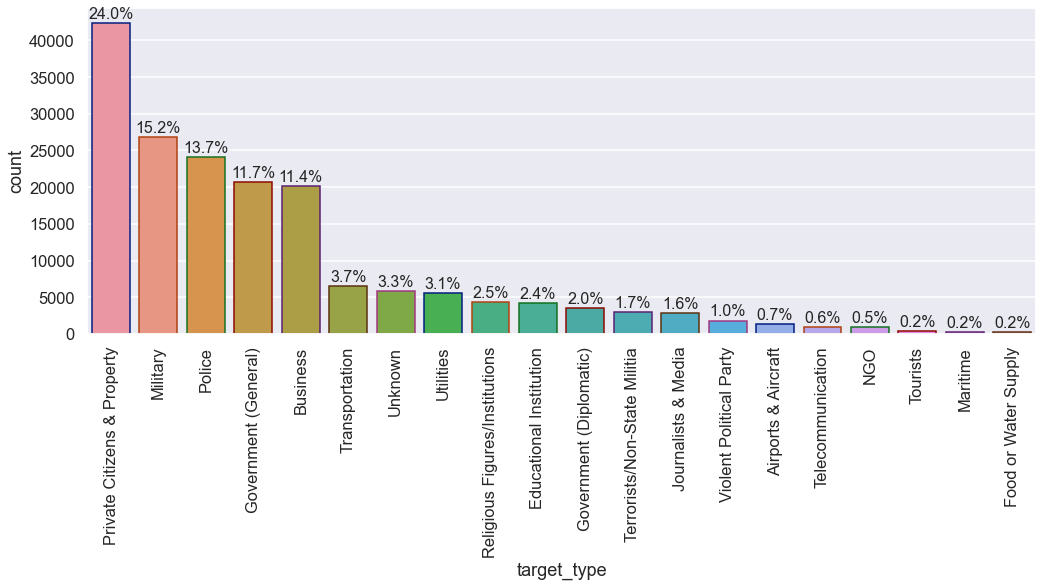

<Figure size 432x288 with 0 Axes>

In [40]:
count_plot(df_copy , 'target_type')

- It seems like Terror groups really hate government or they don't like policies of theirs as ~ 50% attacks are Government_officials/Police/Military.

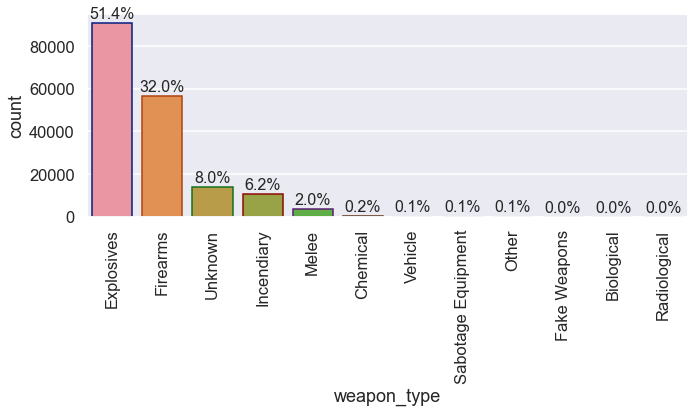

In [41]:
count_plot(df_copy, 'weapon_type')

- Bombs/Explosives are most used weapon along with Guns (might be AK-47 or their variant as seen often in videos).
- We can take deep breath as these notorious groups **still didn't possess weapons of mass destruction like Biological/Radiological** as seen by data till now.

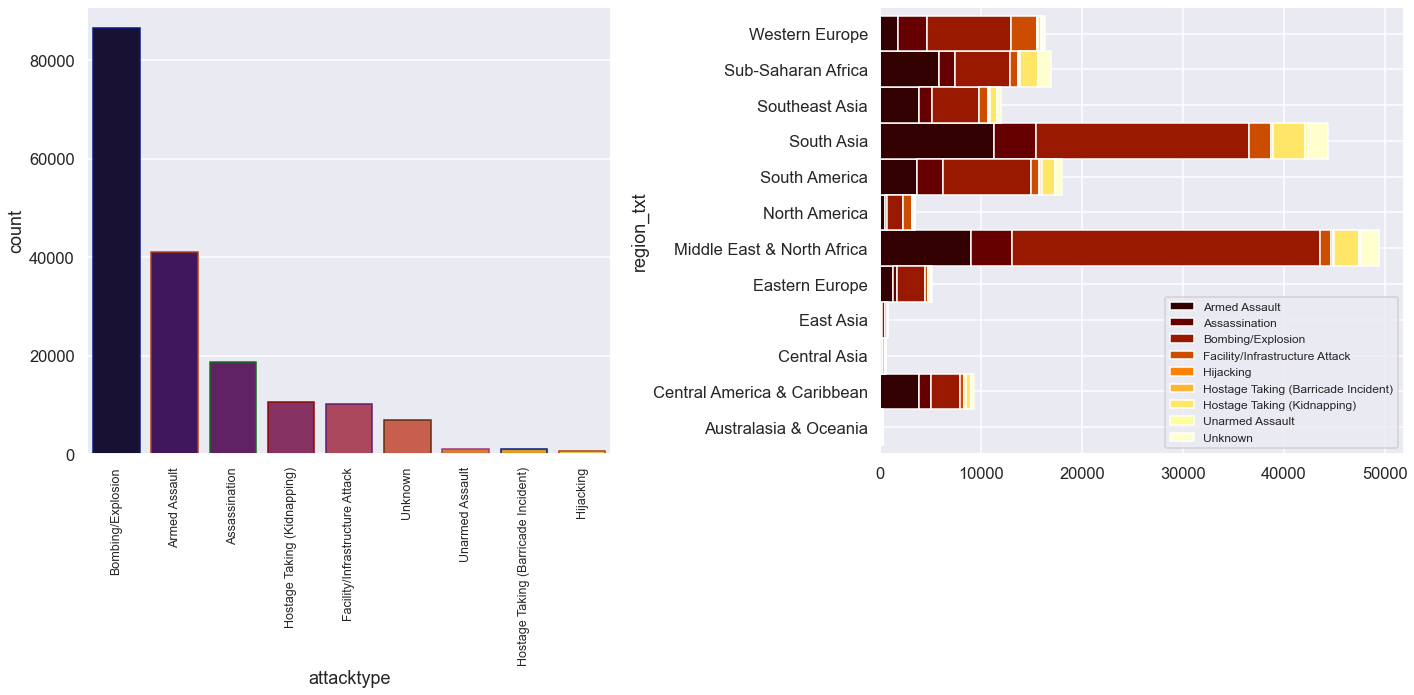

In [27]:
# Is there any specific type of wepaons uused with respect to region?
fig, ax = plt.subplots(nrows=1, ncols=2 , squeeze = False , figsize =(20,10))
sns.countplot(x = 'attacktype', data = df_copy,\
                           order = df_copy['attacktype'].value_counts()[:20].index, \
                           palette = 'inferno', \
                           edgecolor=sns.color_palette('dark',7),\
                           ax = ax[0][0])
        
total = float(len(df_copy))
labels = ax[0][0].get_xticklabels()
ax[0][0].set_xticklabels(labels,rotation =90, fontsize = 'x-small')  # rotating x-axis labels
        #plt.tight_layout()
sns.set_context('talk')  # setting size of labels , lines and other elements in plot but doesn't change overall style
region_attacktype=pd.crosstab(df_copy.region_txt, df_copy.attacktype).plot(stacked=True,width=1,color=sns.color_palette('afmhot',9),kind = 'barh' , ax = ax[0][1])
plt.legend(fontsize = 12)
plt.tight_layout()  # minimize the overlap of subplots
plt.show()

- It seems like most prominent attack mode of terrorist is **Bomb/Explosive and Armed Assault** irrespective of any region if the attack happened there.
- It might be due to easy accessibility of these as it doesn't require industrial setup to manufacture.


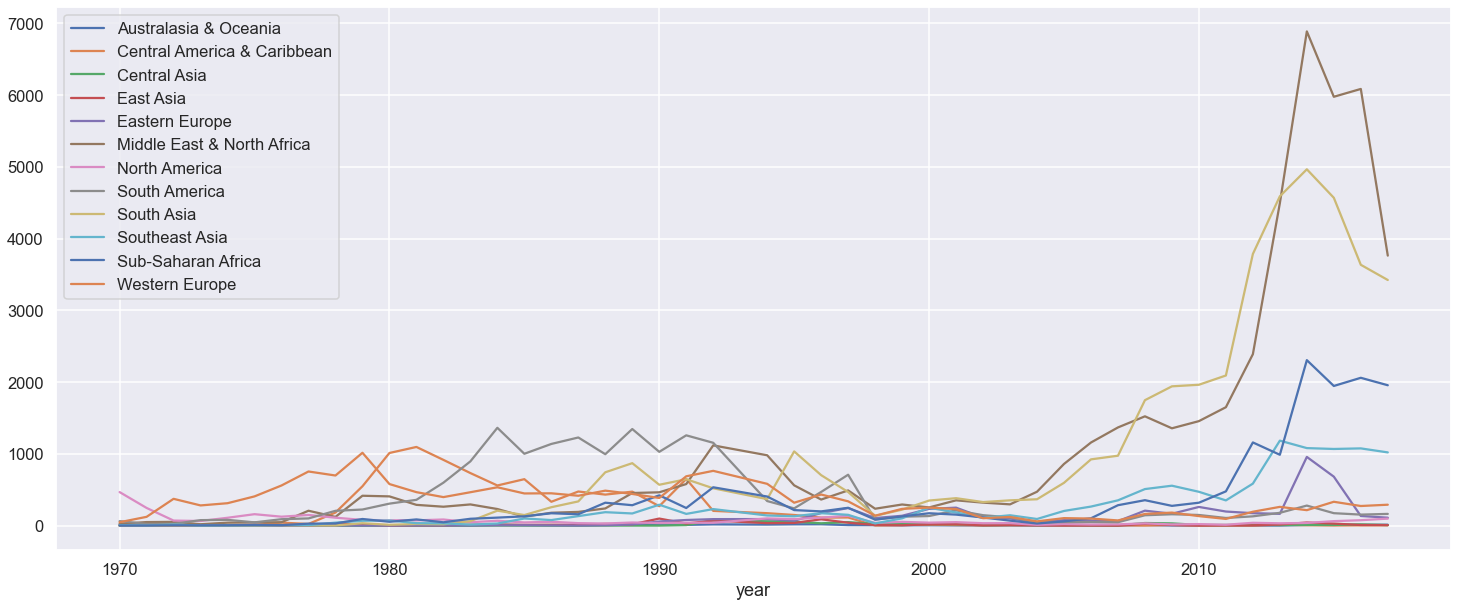

In [43]:
terror_region  = pd.crosstab(df_copy.year , df_copy.region_txt )
terror_region.plot()

fig=plt.gcf()
fig.set_size_inches(25,10)
plt.legend(loc='upper left')
plt.show()
#plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

- This graph confirms that Attacks increase exponentially after 2002 as ISIS and their groups became active and gain control of Crude Oil refineries in Middle East from which they get most of their cash for notorious activities.
- This follows attack in neigbouring regions where there are under-developed region like Afghanistan and Pakistan i.e South Asia region as religious propoganda can be spread easily where there is poverty among people.

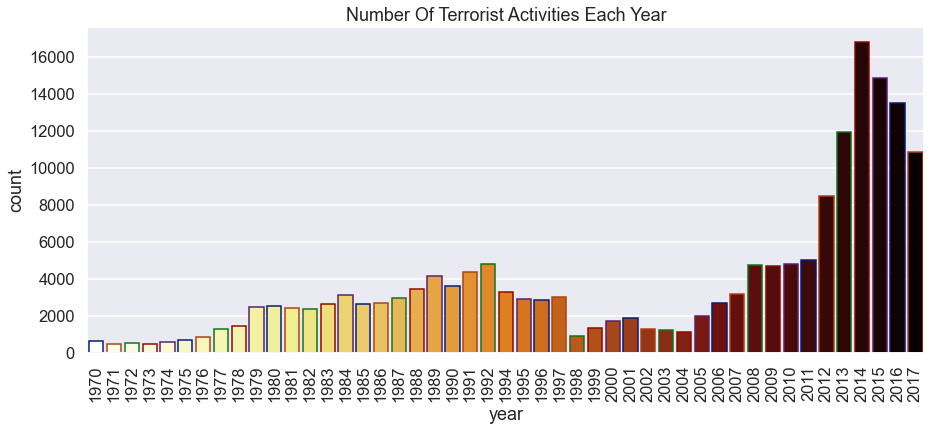

In [44]:
plt.subplots(figsize=(15,6))
sns.countplot('year',data=df,palette='afmhot_r',edgecolor=sns.color_palette('dark',5))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

- Look at the increase in cases of attack year after year after 2002-2004

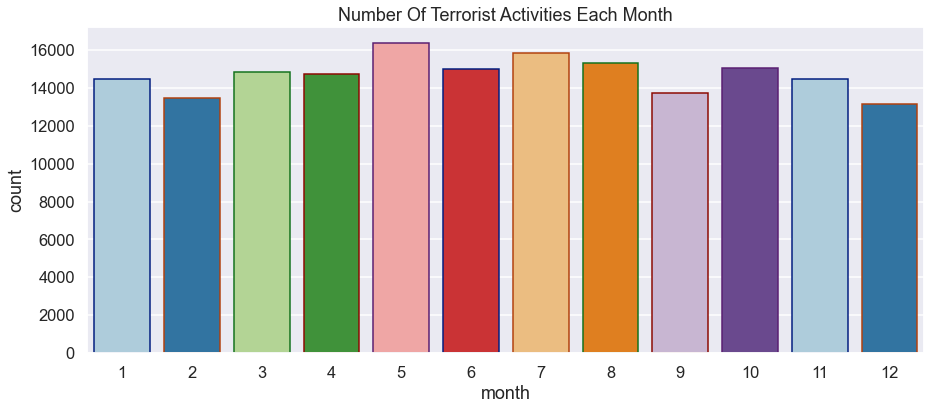

In [45]:
plt.subplots(figsize=(15,6))
sns.countplot('month',data=df,palette=sns.color_palette('Paired',10),edgecolor=sns.color_palette('dark',5))
#plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Month')
plt.show()

- These guys doesn't even take a break. 

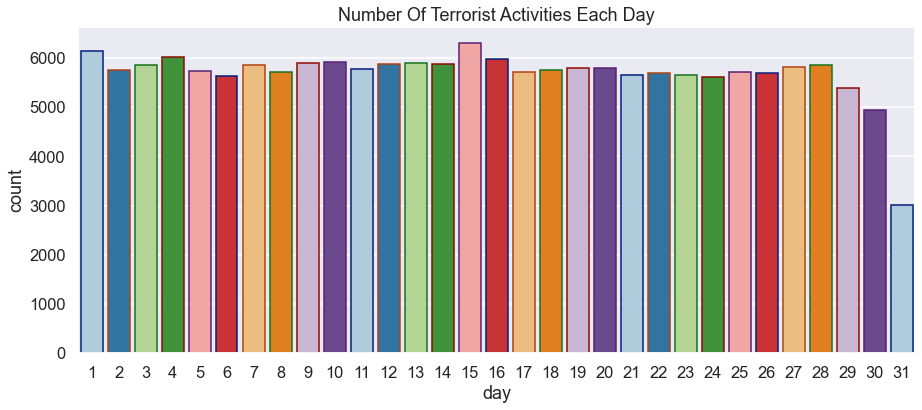

In [46]:
plt.subplots(figsize=(15,6))
sns.countplot('day',data=df,palette=sns.color_palette('Paired',10),edgecolor=sns.color_palette('dark',5))
#plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Day')
plt.show()

- Not even a single day :(

### Motivation behind theses attacks?

In [98]:
df_original.motive.dropna().sample(10).tolist()

["The specific motive is unknown; however, sources noted that the assailants believed that the conclusion of President Joseph Kabila's leadership would bring about an apocalypse.",
 'The specific motive for the attack is unknown.',
 'The specific motive for the attack is unknown.',
 'The specific motive is unknown; however, sources posited that the Tripoli Province of the Islamic State was looking for weapons.',
 'Unknown',
 "The specific motive is unknown; however, sources speculated that Al-Qa'ida in Iraq (AQI) coordinated the series of attacks to show their effectiveness and the government's inability to provide security for Iraqis.",
 'FALN members claimed they were protesting the presence of Puerto Rican delegation at the Democratic National Convention.',
 'The specific motive is unknown; however, sources suspected that the attack was carried out in retaliation for a military operation targeting the Abu Sayyaf Group (ASG) the previous weekend, in which three ASG members were kille

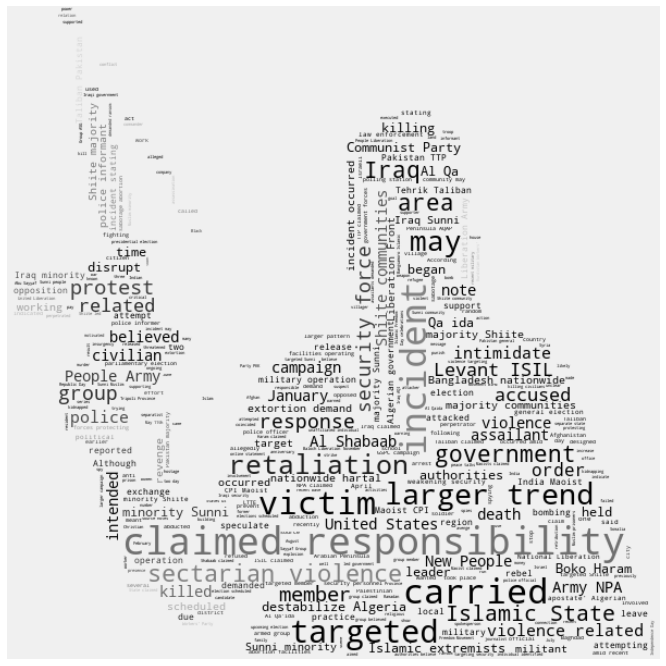

In [102]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
stopwords = set(STOPWORDS)
stopwords.update(["Unknown",'unknown','specific','motive','sources','noted','part','stated','posited','speculated','attack','attacks','suspected'])
motive = df_original.motive.dropna()
terror_mask = np.array(Image.open("images/terrorist.jpg"))
plt.subplots(figsize=(14,12))
wordcloud_fra = WordCloud(background_color = '#F0F0F0',
                     width = 512,
                     height = 384,stopwords = stopwords, max_font_size=90, random_state=43, contour_color='firebrick',mask = terror_mask, max_words=20000).generate(' '.join(motive))
image_colors = ImageColorGenerator(terror_mask)

#wordcloud_fra.to_file(("city_m.png"))

plt.axis('off')
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation='bilinear')

plt.savefig("terror_word_cloud.png", format="png")

plt.show()

### 

#### To conclude with what I find with data and am i correct with these is upto the reader and many people will have many perspective in what they are receiving as and how they are receiving with their own biases which everyone have in some way. I would say that I found the the definition relevant in most sense with respect to these words used in as "threatening","illegal use of force","non-state actors","Violence","Political","Religious","Social","fear","coercion","intimidation" but what I didn't find is the "economic" goal. However, I will say that this definition might not only tells the motive as direct action which we see but there may be indirect goals which are fulfilled by these attacks.

In [50]:
# def numerical_plot(data , feature):
#     plt.figure(figsize = (15,6))
#     bins = max(round(data[feature].nunique()/100), min(data[feature].nunique(), 10))        
#     ax = sns.distplot(feature , kde = True , hist = True ,bins = bins, rug = False , color = 'C3' )
#     plt.xticks(rotation=90)
#     plt.show()

In [51]:
## Color Palettes
# -------------------------------------------------------
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 
# 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
# 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu',
# 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r',
# 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 
# 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r',
# 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu',
# 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r',
# 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu',
# 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
# 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds',
# 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 
# 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia',
# 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r',
# 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot',
# 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r',
# 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 
# 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
# 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r',
# 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
# 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r',
# 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r',
# 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 
# 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 
# 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r',
# 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
# 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 
# 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic',
# 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10',
# 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c',
# 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
# 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis',
# 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'